In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import plotly.graph_objs as go
from matplotlib.text import Text


In [2]:
def df_origen(origen,destino): 
    
    ################### Origen Común ###########################
    with open('/home/jonathan/tesis/3er_avance/columns_names2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)

    df = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
        
    #Cabiamos la frecuencia a dias
    df.index.freq = df.index.inferred_freq
    df_Dia = df.resample('24H').sum()

    #Sacamos una lista de los trayectos origen en comun con mayor número de viajes
    mean_df = df_Dia.mean()
    mean_dict = mean_df.to_dict()
    main_lines = list(dict.keys(dict(filter(lambda x: x[1] > 15000, mean_dict.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    
    main_lines.insert(0,"ds")    
    df_main_lines = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines)

    df_main_lines['Año'] = df_main_lines.index.year                                
    df_main_lines['Mes'] = df_main_lines.index.month                               
    df_main_lines['Dia'] = df_main_lines.index.day_name()
    df_main_lines['ID_Dia'] = df_main_lines.index.dayofweek
    df_main_lines['Hora'] = df_main_lines.index.hour
    df_main_lines['#_Semana'] = df_main_lines.index.isocalendar().week    
    
    ################### Destino Común ###########################
    with open('/home/jonathan/tesis/3er_avance/columns_names2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(destino)    
        if x==True:                         
            lista.append(trayectos)

    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
        
    #Cabiamos la frecuencia a dias
    df2.index.freq = df2.index.inferred_freq
    df2_Dia = df2.resample('24H').sum()

    #Sacamos una lista de los trayectos origen en comun con mayor número de viajes
    mean_df2 = df2_Dia.mean()
    mean_dict2 = mean_df2.to_dict()
    main_lines2 = list(dict.keys(dict(filter(lambda x: x[1] > 15000, mean_dict2.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    
    main_lines2.insert(0,"ds")    
    df_main_lines2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines2)

    df_main_lines2['Año'] = df_main_lines2.index.year                                
    df_main_lines2['Mes'] = df_main_lines2.index.month                               
    df_main_lines2['Dia'] = df_main_lines2.index.day_name()
    df_main_lines2['ID_Dia'] = df_main_lines2.index.dayofweek
    df_main_lines2['Hora'] = df_main_lines2.index.hour
    df_main_lines2['#_Semana'] = df_main_lines2.index.isocalendar().week    
    
    return main_lines, df_main_lines, df_Dia, main_lines2, df_main_lines2, df2_Dia

In [3]:
origen = "2807905"
destino = "2807901"
Trayecto = origen + "-" + destino
print(Trayecto)
main_lines,df_main_lines, df_Dia, main_lines2,df_main_lines2, df2_Dia = df_origen(origen,destino)

2807905-2807901


## Gráfica distritos origen común

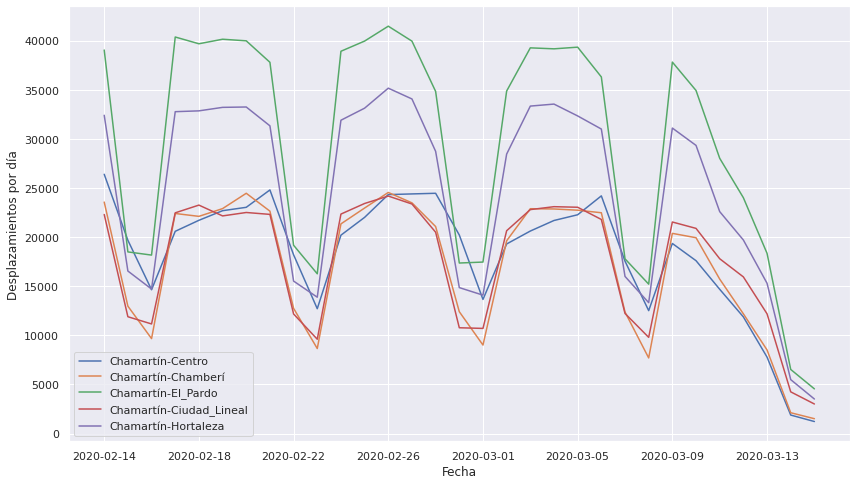

In [4]:
sb.set(rc = {'figure.figsize':(14,8)})
for trayecto in main_lines:    
    if trayecto=="ds":                
        continue
    origen = trayecto.split("-",1)[0]
    destino = trayecto.split("-",1)[1]        
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid","2807921":"Fuera_Madrid"}    
    x=trayecto.startswith(origen)    
    if x==True:
        ax = sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-02-14':'2020-03-15'],legend='brief',label=lines_names[origen]+'-'+lines_names[destino])        
        plt.ylabel("Desplazamientos por día")
        plt.xlabel("Fecha")
        ax.xaxis.set_ticks(['2020-02-14','2020-02-18','2020-02-22','2020-02-26','2020-03-01','2020-03-05','2020-03-09','2020-03-13'])

## Gráfica distritos destino común

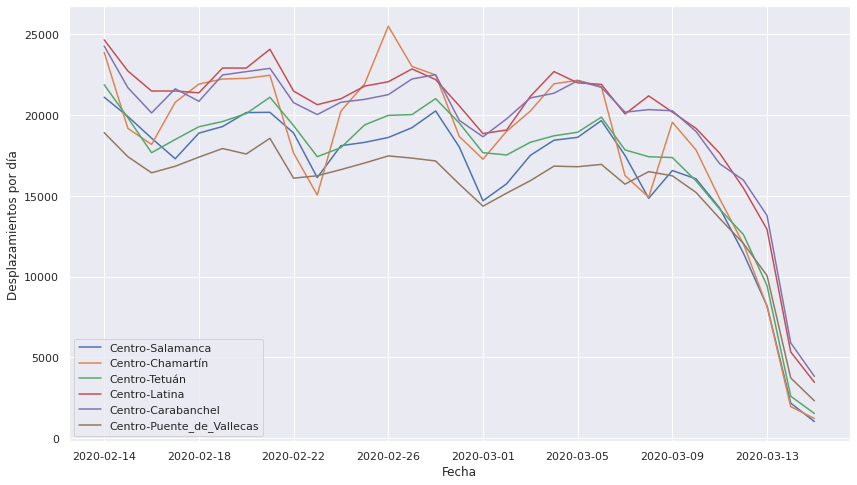

In [5]:
sb.set(rc = {'figure.figsize':(14,8)})
#for trayecto in lista:
for trayecto in main_lines2:    
    if trayecto=="ds":                
        continue
    origen = trayecto.split("-",1)[0]
    destino = trayecto.split("-",1)[1]        
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid","2807921":"Fuera_Madrid"}    
    x=trayecto.endswith(destino)    
    if x==True:
        ax = sb.lineplot(x="ds", y=trayecto, data=df2_Dia.loc['2020-02-14':'2020-03-15'],legend='brief',label=lines_names[origen]+'-'+lines_names[destino])        
        plt.ylabel("Desplazamientos por día")
        plt.xlabel("Fecha")
        ax.xaxis.set_ticks(['2020-02-14','2020-02-18','2020-02-22','2020-02-26','2020-03-01','2020-03-05','2020-03-09','2020-03-13'])

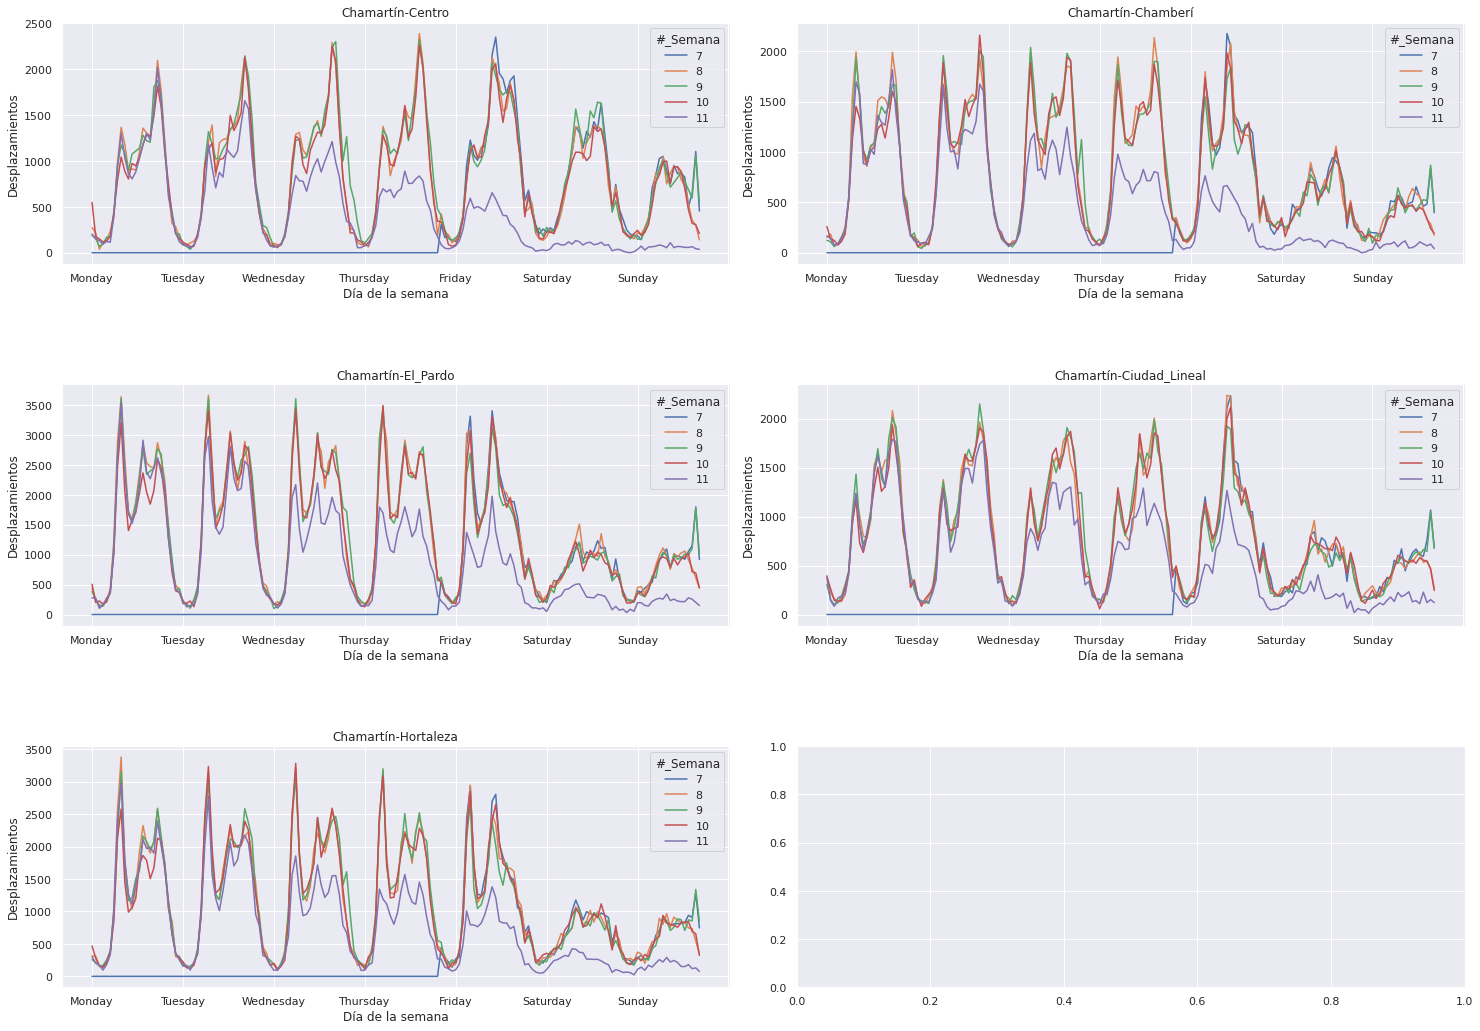

In [6]:
data1=df_main_lines.loc['2020-02-14':'2020-03-15']
cont=1
for line in main_lines:    
    if line=="ds":        
        continue    

    globals()[f"table1_{cont}"] = pd.pivot_table(data1, values=line, index=['ID_Dia','Dia','Hora'],
                            columns=['#_Semana'],fill_value=0)
    cont=cont+1
    
sb.set(rc = {'figure.figsize':(15,8)})
rows = math.ceil((len(main_lines)-1)/2)
cont2=1
ax=0
for line in main_lines:
    origen = line[0:7]
    destino = line[8:15]
    lines_names = {"2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}
    
    if line=="ds":        
        fig, axes = plt.subplots(nrows=rows, ncols=2)
        ax_list = fig.axes
        plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.8, wspace=0.1, hspace=0.5)
        continue
    globals()[f"table1_{cont2}"].plot(ax=ax_list[ax]); ax_list[ax].set_title(lines_names[origen]+"-"+lines_names[destino])
    ax_list[ax].set_xlabel("Día de la semana")
    ax_list[ax].set_ylabel("Desplazamientos")
    
    # Descartamos ID_Dia y Hora en las etiquetas xtick.
    current_xticklabels = ax_list[ax].get_xticklabels()
    
    # Procesar las etiquetas para mostrar solo el nombre del día
    processed_xticklabels = [label.get_text().split(',')[1].strip() if len(label.get_text().split(',')) >= 2 else label.get_text() for label in current_xticklabels]
    
    # Establecer las nuevas etiquetas de los ticks
    ax_list[ax].set_xticklabels(processed_xticklabels)
    
    cont2=cont2+1   
    ax=ax+1    

In [7]:
TablaTrayecto = pd.pivot_table(data1, values=Trayecto, index=['ID_Dia','Dia','Hora'],
                                columns=['#_Semana'],fill_value=0)
origen = Trayecto[0:7]
destino = Trayecto[8:15]
lines_names = {"2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}
TablaTrayecto = TablaTrayecto.rename(columns={TablaTrayecto.columns[0]:'1',TablaTrayecto.columns[1]:'2',TablaTrayecto.columns[2]:'3',TablaTrayecto.columns[3]:'4',TablaTrayecto.columns[4]:'5'})

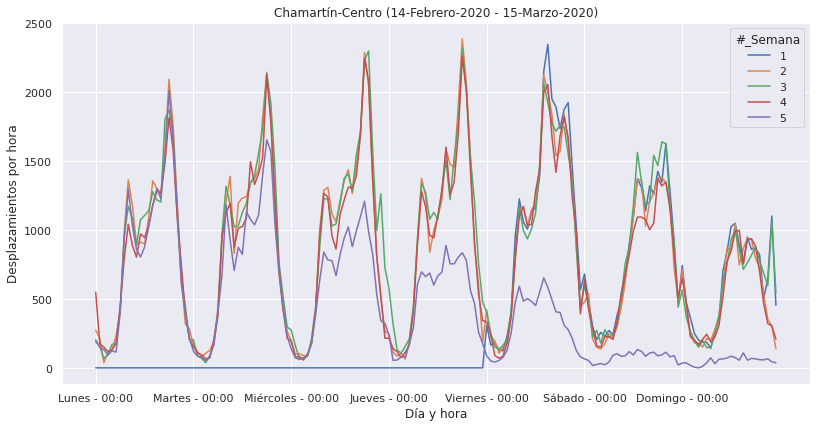

In [8]:
sb.set(rc = {'figure.figsize':(8,3)})
ax=0

fig, axes = plt.subplots(nrows=1, ncols=1)
ax_list = fig.axes
plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.8, wspace=0.1, hspace=0.5)
TablaTrayecto.plot(ax=ax_list[ax]); ax_list[ax].set_title(lines_names[origen]+"-"+lines_names[destino]+" "+'(14-Febrero-2020 - 15-Marzo-2020)')
ax_list[ax].set_xlabel("Día y hora")
ax_list[ax].set_ylabel("Desplazamientos por hora")

#########################################################
# Obtener los ejes de la gráfica
ax = ax_list[ax]

# Modificar la posición de los xticks
new_xticks = [0, 24, 48, 72, 96, 120, 144]  # Nuevas posiciones de los xticks
ax.set_xticks(new_xticks)

# Asignar etiquetas a los xticks
xtick_labels = ['Lunes - 00:00', 'Martes - 00:00', 'Miércoles - 00:00', 'Jueves - 00:00', 'Viernes - 00:00', 'Sábado - 00:00', 'Domingo - 00:00']
ax.set_xticklabels(xtick_labels)

plt.show()